In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import os
output_folder = 'box_plots'
os.makedirs(output_folder, exist_ok=True)

In [18]:
file_name='/content/drive/MyDrive/Monthly_mean_SN_number.txt'
with open(file_name,'r') as f:
  lines=f.readlines()
  data = [line.strip().split() for line in lines if line.strip()]

In [19]:
columns=["Year", "Month","year in fraction","SN","Standard Deviation","No fo observations","D"]

In [8]:
df=pd.DataFrame(data, columns=columns)
df

,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
0,1749,01,1749.042,96.7,-1.0,-1,None
1,1749,02,1749.123,104.3,-1.0,-1,None
2,1749,03,1749.204,116.7,-1.0,-1,None
3,1749,04,1749.288,92.8,-1.0,-1,None
4,1749,05,1749.371,141.7,-1.0,-1,None
...,...,...,...,...,...,...,...
3309,2024,10,2024.791,166.4,23.9,893,*
3310,2024,11,2024.873,152.5,20.9,681,*
3311,2024,12,2024.958,154.5,25.6,572,*
3312,2025,01,2025.042,137.0,23.3,670,*


In [9]:
df.insert(0, 'date', df['Year'].astype(str) + '-' + df['Month'].astype(str))
df

,date,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
0,1749-01,1749,01,1749.042,96.7,-1.0,-1,None
1,1749-02,1749,02,1749.123,104.3,-1.0,-1,None
2,1749-03,1749,03,1749.204,116.7,-1.0,-1,None
3,1749-04,1749,04,1749.288,92.8,-1.0,-1,None
4,1749-05,1749,05,1749.371,141.7,-1.0,-1,None
...,...,...,...,...,...,...,...,...
3309,2024-10,2024,10,2024.791,166.4,23.9,893,*
3310,2024-11,2024,11,2024.873,152.5,20.9,681,*
3311,2024-12,2024,12,2024.958,154.5,25.6,572,*
3312,2025-01,2025,01,2025.042,137.0,23.3,670,*


In [10]:
df['SN']=pd.to_numeric(df['SN'], errors= 'coerce')

In [11]:
df['date'] = pd.to_datetime(df['date'])
df

,date,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
0,1749-01-01,1749,01,1749.042,96.7,-1.0,-1,None
1,1749-02-01,1749,02,1749.123,104.3,-1.0,-1,None
2,1749-03-01,1749,03,1749.204,116.7,-1.0,-1,None
3,1749-04-01,1749,04,1749.288,92.8,-1.0,-1,None
4,1749-05-01,1749,05,1749.371,141.7,-1.0,-1,None
...,...,...,...,...,...,...,...,...
3309,2024-10-01,2024,10,2024.791,166.4,23.9,893,*
3310,2024-11-01,2024,11,2024.873,152.5,20.9,681,*
3311,2024-12-01,2024,12,2024.958,154.5,25.6,572,*
3312,2025-01-01,2025,01,2025.042,137.0,23.3,670,*


In [12]:
solar_cycles = [
    {"Cycle Number": 1,  "Start Date": "1755-02-01", "End Date": "1766-06-01"},
    {"Cycle Number": 2,  "Start Date": "1766-06-01", "End Date": "1775-06-01"},
    {"Cycle Number": 3,  "Start Date": "1775-06-01", "End Date": "1784-09-01"},
    {"Cycle Number": 4,  "Start Date": "1784-09-01", "End Date": "1798-04-01"},
    {"Cycle Number": 5,  "Start Date": "1798-04-01", "End Date": "1810-08-01"},
    {"Cycle Number": 6,  "Start Date": "1810-08-01", "End Date": "1823-05-01"},
    {"Cycle Number": 7,  "Start Date": "1823-05-01", "End Date": "1833-11-01"},
    {"Cycle Number": 8,  "Start Date": "1833-11-01", "End Date": "1843-07-01"},
    {"Cycle Number": 9,  "Start Date": "1843-07-01", "End Date": "1855-12-01"},
    {"Cycle Number": 10, "Start Date": "1855-12-01", "End Date": "1867-03-01"},
    {"Cycle Number": 11, "Start Date": "1867-03-01", "End Date": "1878-12-01"},
    {"Cycle Number": 12, "Start Date": "1878-12-01", "End Date": "1890-03-01"},
    {"Cycle Number": 13, "Start Date": "1890-03-01", "End Date": "1902-01-01"},
    {"Cycle Number": 14, "Start Date": "1902-01-01", "End Date": "1913-07-01"},
    {"Cycle Number": 15, "Start Date": "1913-07-01", "End Date": "1923-08-01"},
    {"Cycle Number": 16, "Start Date": "1923-08-01", "End Date": "1933-09-01"},
    {"Cycle Number": 17, "Start Date": "1933-09-01", "End Date": "1944-02-01"},
    {"Cycle Number": 18, "Start Date": "1944-02-01", "End Date": "1954-04-01"},
    {"Cycle Number": 19, "Start Date": "1954-04-01", "End Date": "1964-10-01"},
    {"Cycle Number": 20, "Start Date": "1964-10-01", "End Date": "1976-03-01"},
    {"Cycle Number": 21, "Start Date": "1976-03-01", "End Date": "1986-09-01"},
    {"Cycle Number": 22, "Start Date": "1986-09-01", "End Date": "1996-08-01"},
    {"Cycle Number": 23, "Start Date": "1996-08-01", "End Date": "2008-12-01"},
    {"Cycle Number": 24, "Start Date": "2008-12-01", "End Date": "2019-12-01"}
]

In [13]:
for cycle in solar_cycles:
    cycle['Start Date'] = pd.to_datetime(cycle['Start Date'])
    cycle['End Date'] = pd.to_datetime(cycle['End Date'])

In [14]:
start_date='1755-02-01'
end_date='2025-02-01'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
filtered_df

,date,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
73,1755-02-01,1755,02,1755.123,18.7,-1.0,-1,None
74,1755-03-01,1755,03,1755.204,11.3,-1.0,-1,None
75,1755-04-01,1755,04,1755.288,10.8,-1.0,-1,None
76,1755-05-01,1755,05,1755.371,0.0,-1.0,-1,None
77,1755-06-01,1755,06,1755.455,0.0,-1.0,-1,None
...,...,...,...,...,...,...,...,...
3309,2024-10-01,2024,10,2024.791,166.4,23.9,893,*
3310,2024-11-01,2024,11,2024.873,152.5,20.9,681,*
3311,2024-12-01,2024,12,2024.958,154.5,25.6,572,*
3312,2025-01-01,2025,01,2025.042,137.0,23.3,670,*


Cycle 1: 0 outliers


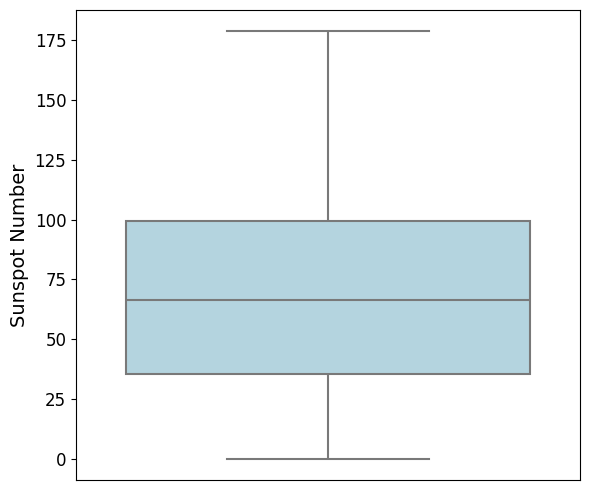

Cycle 2: 0 outliers


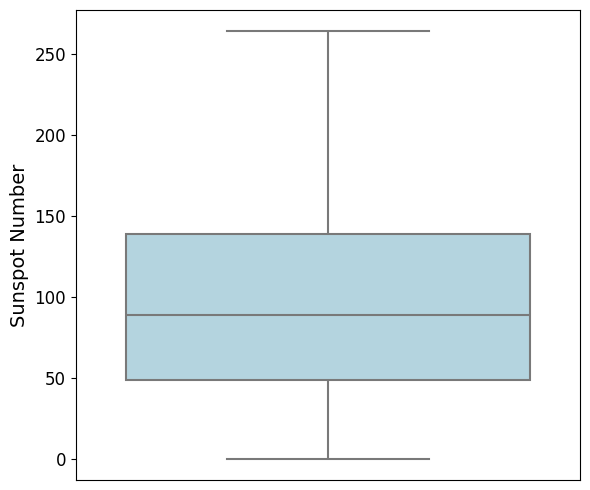

Cycle 3: 1 outliers


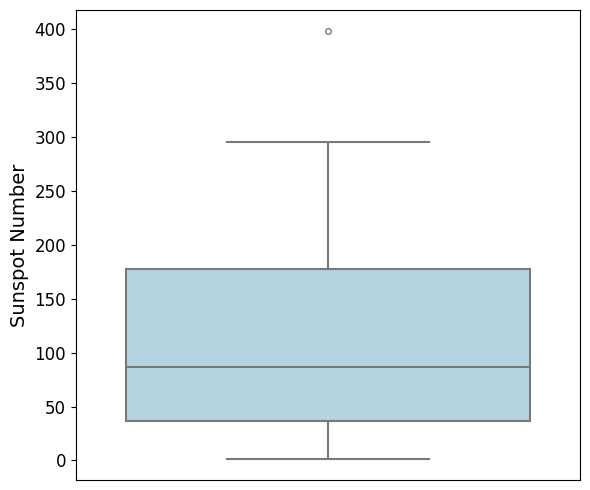

Cycle 4: 0 outliers


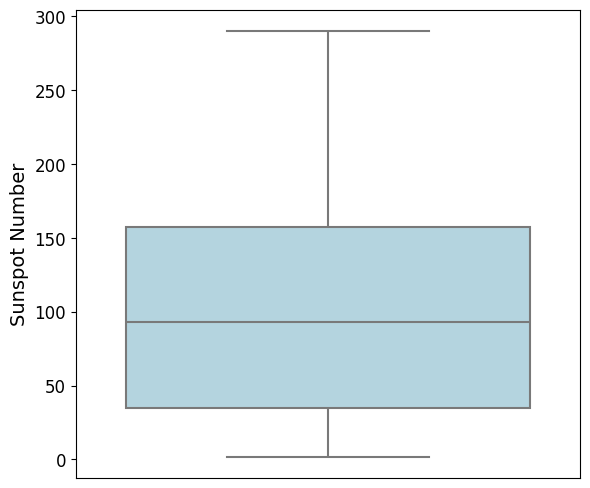

Cycle 5: 0 outliers


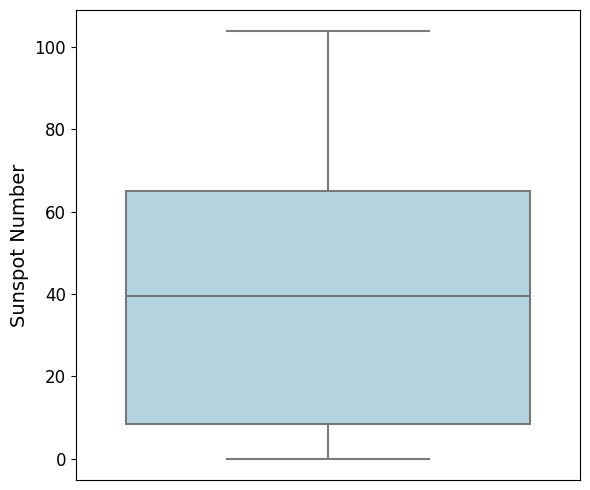

Cycle 6: 3 outliers


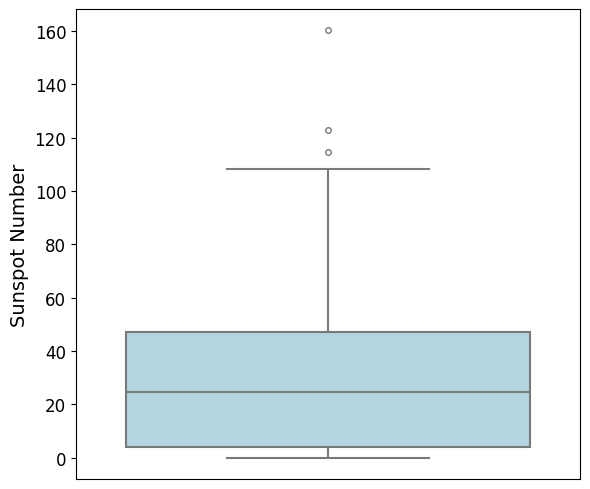

Cycle 7: 0 outliers


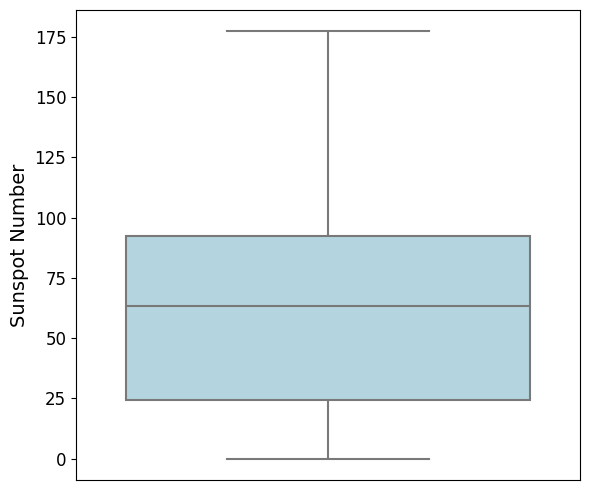

Cycle 8: 0 outliers


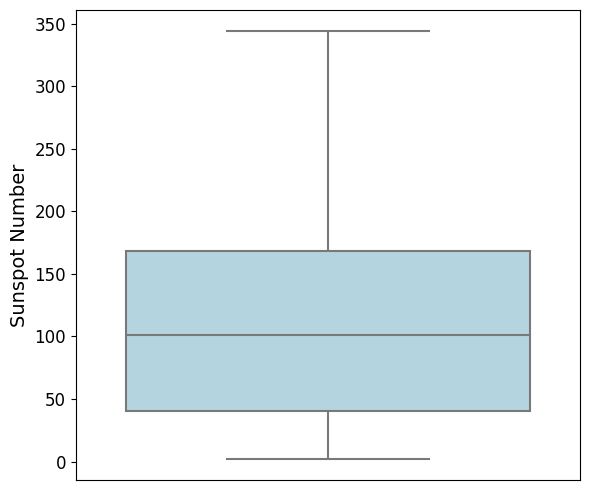

Cycle 9: 2 outliers


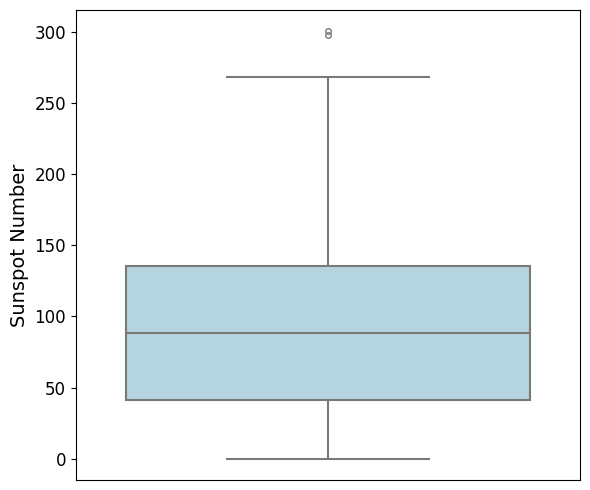

Cycle 10: 0 outliers


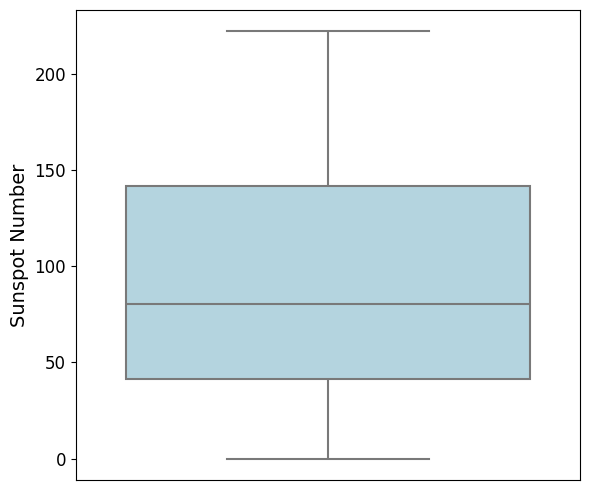

Cycle 11: 0 outliers


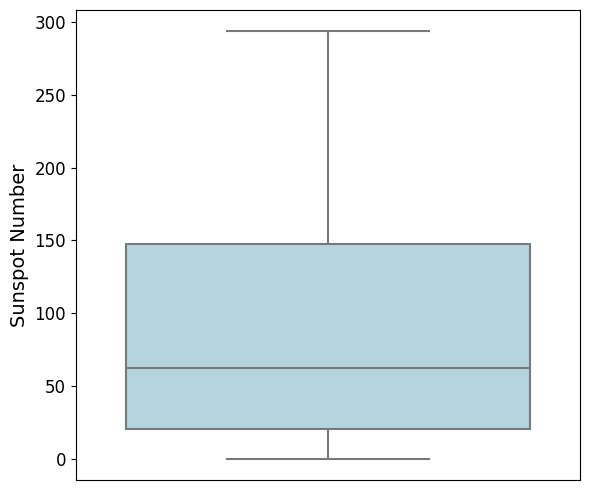

Cycle 12: 0 outliers


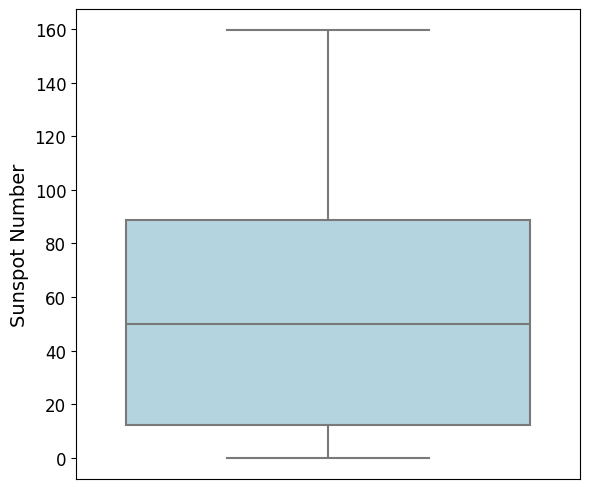

Cycle 13: 0 outliers


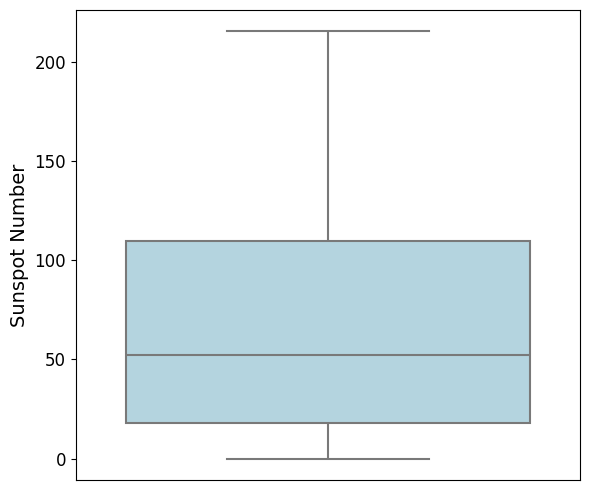

Cycle 14: 0 outliers


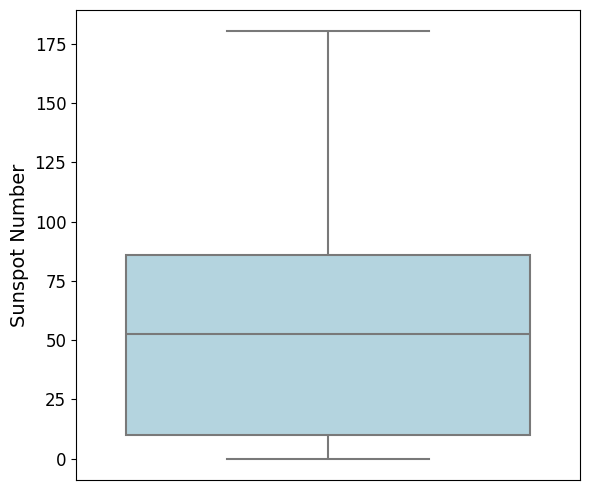

Cycle 15: 1 outliers


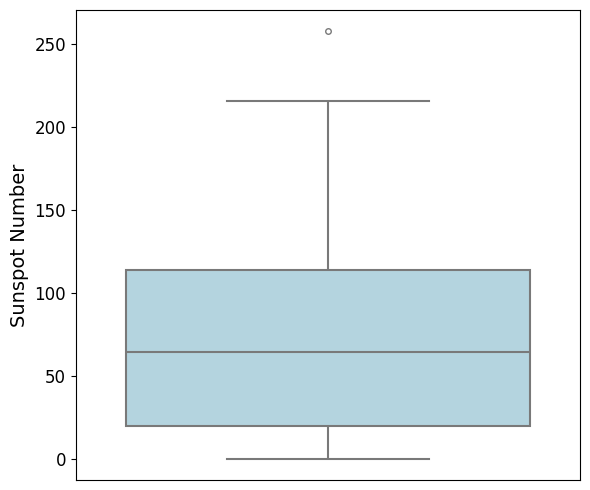

Cycle 16: 0 outliers


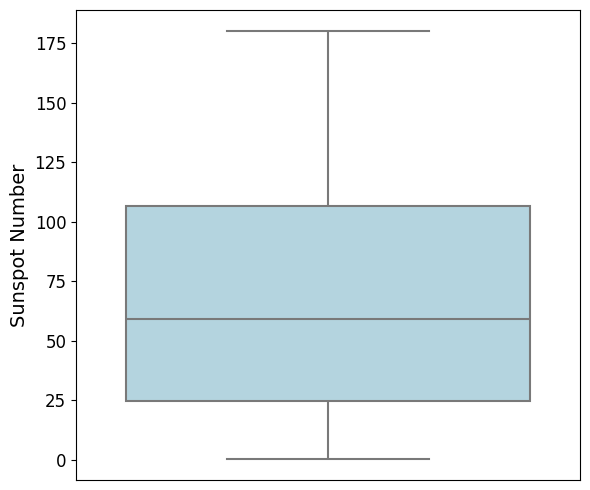

Cycle 17: 0 outliers


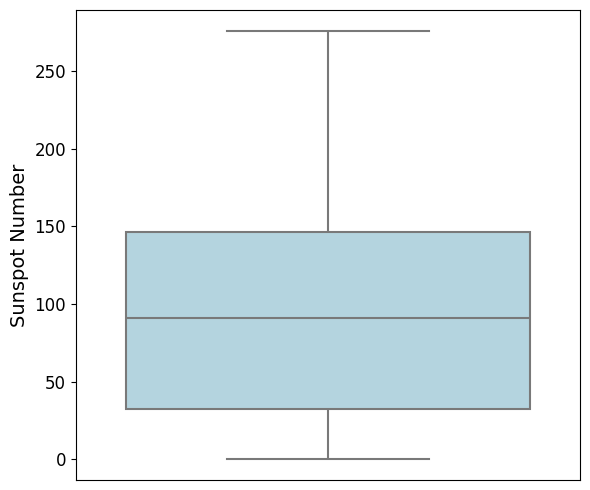

Cycle 18: 0 outliers


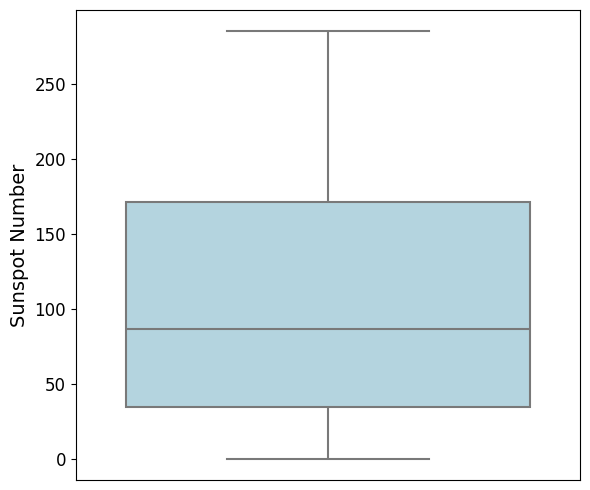

Cycle 19: 0 outliers


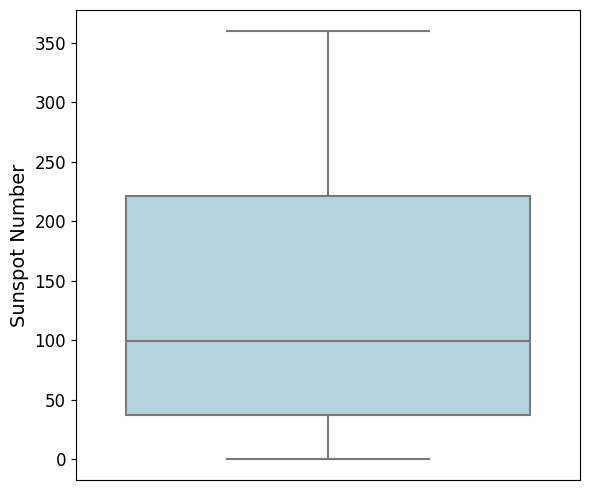

Cycle 20: 0 outliers


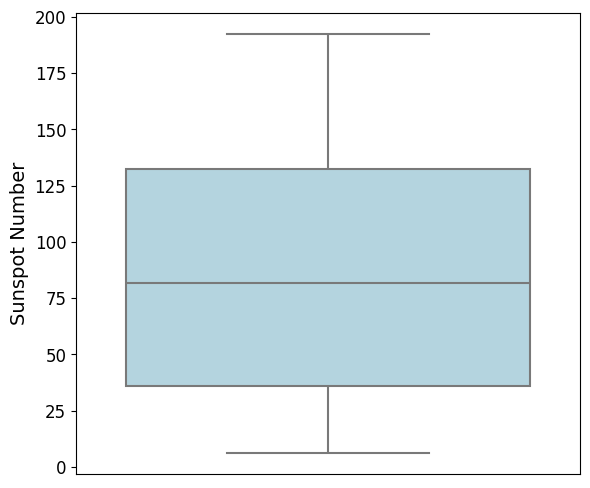

Cycle 21: 0 outliers


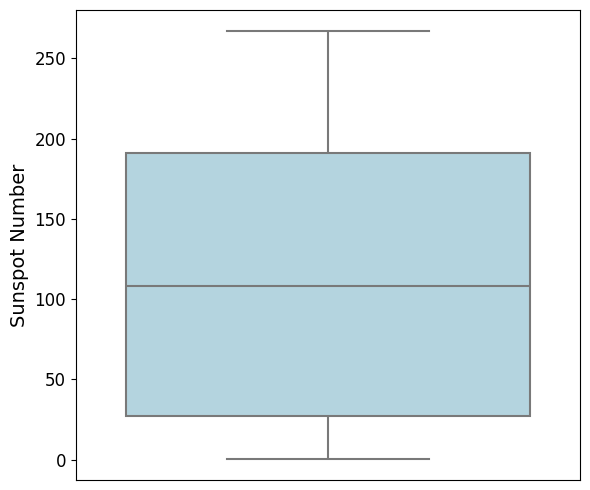

Cycle 22: 0 outliers


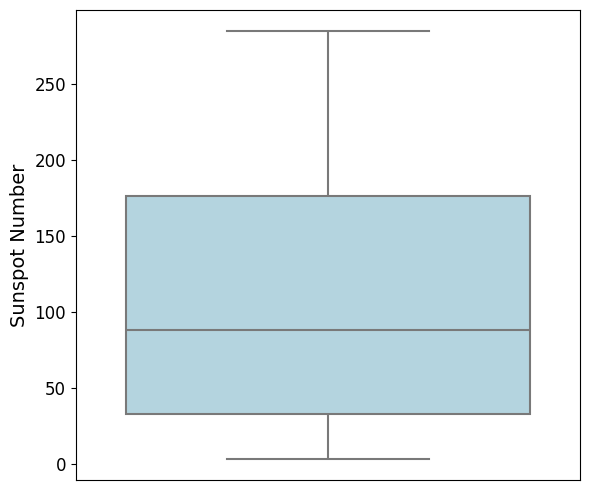

Cycle 23: 0 outliers


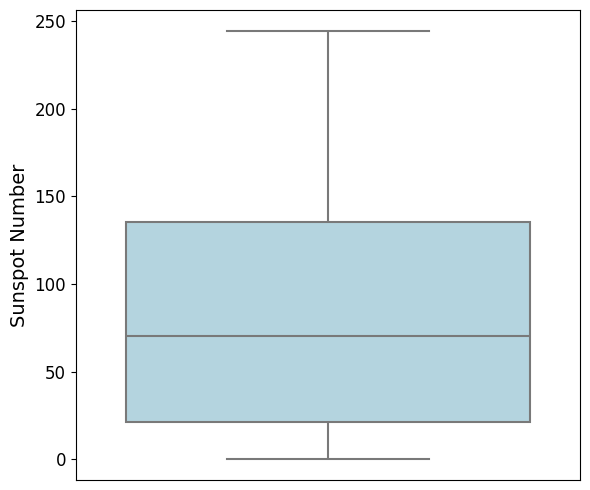

Cycle 24: 0 outliers


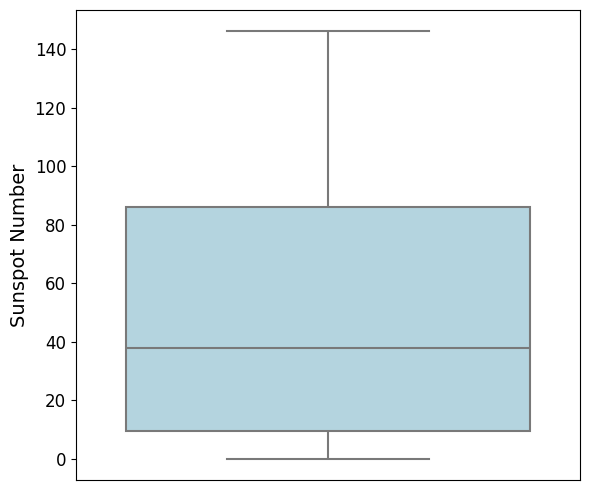

In [15]:
for cycle in solar_cycles:
    start_date = cycle['Start Date']
    end_date = cycle['End Date']
    cycle_num = cycle['Cycle Number']
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)].dropna(subset=['SN'])
    x = (filtered_df['date'] - filtered_df['date'].min()).dt.days.values
    y = filtered_df['SN'].values

    q1 = filtered_df['SN'].quantile(0.25)
    q3 = filtered_df['SN'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_df = filtered_df[(filtered_df['SN'] < lower_bound) | (filtered_df['SN'] > upper_bound)]
    print(f"Cycle {cycle_num}: {len(outliers_df)} outliers")


    plt.figure(figsize=(6, 5))
    sns.boxplot(y=filtered_df['SN'], color="lightblue", fliersize=4, linewidth=1.5)
    plt.ylabel("Sunspot Number", fontsize=14)
    # plt.title(f"Solar Cycle {cycle_num}: Distribution of Sunspot Numbers", fontsize=14, weight="bold")
    plt.xticks([])
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig( os.path.join(output_folder, f"cycle_{cycle_num}_boxplot.png"), dpi=300, bbox_inches='tight')
    plt.show()

